# CSE375 Machine Learning and Pattern Recognition Project
### Name: Ghaith Bassam Zaza.     
### Code: 1901458.
### CSE senior2.

## step 1:
Read data using pandas.


In [1]:
import pandas as pd
import numpy as np

#import data
headers = [*pd.read_csv('data.csv', nrows=1)]
data = pd.read_csv("data.csv", usecols=[i for i in range(1,15)], names = headers, skiprows=[0])
print(data.shape)
data.head(6)


(863, 14)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


## Step 2:
Split the data into parameters(X) and target(Y).

In [2]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X.head(6)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0


## Step 3:
Split the data into training, validation, and testing sets.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("X_val ",X_val.shape)
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)
print("Y_val ",Y_val.shape)

X_train:  (517, 13)
X_test:  (173, 13)
X_val  (173, 13)
Y_train:  (517,)
Y_test:  (173,)
Y_val  (173,)


## step 4:
### Normalize the features:
This is done by subtracting the mean and dividing by the standard deviation for each value of each feature.
Here’s the formula:  
$x_{normalized}​ = \frac{x−μ}{σ​}$  
where:  

x is the original feature vector,  
μ is the mean of the feature vector, and  
σ is the standard deviation of the feature vector.

In [4]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("X_train: ",X_train[0:3,:])
print("X_test: ",X_test[0:3,:])
print("X_val ",X_val[0:3,:])


X_train:  [[ 0.87876783  0.97996271 -1.15776605  0.01044663 -0.4775233  -0.33440687
   0.46713505  0.38877068  0.23367865  0.10942883  0.04402255  0.
  -0.4447895 ]
 [-0.11437133  0.47659388 -1.15776605 -0.6387676  -0.4775233  -0.33440687
  -1.57738406 -0.16189902 -5.82473341  0.10942883  0.04402255  0.
  -0.4447895 ]
 [-1.66774283 -0.65598596  0.21508956  0.01044663 -0.4775233  -0.33440687
   0.46713505  0.38877068  0.23367865  0.10942883  0.04402255  0.
  -0.4447895 ]]
X_test:  [[-0.82739432 -0.53014376  0.21508956  0.12095118 -0.4775233  -0.33440687
  -1.57738406  0.38877068  0.23367865  0.10942883  0.04402255  0.
   2.57527278]
 [-1.66774283 -0.65598596  0.21508956 -1.122225   -0.4775233  -0.33440687
   0.46713505  0.38877068  0.23367865  0.10942883  0.04402255  0.
  -0.4447895 ]
 [ 0.54772144 -1.15935479 -1.15776605  1.43319271 -0.4775233   2.99036916
   0.46713505  0.38877068  0.23367865  0.10942883  0.04402255  0.
  -0.4447895 ]]
X_val  [[ 0.64958187 -1.15935479  0.21508956 -1.8

## Step 5:
### Define the classifiers and Define the hyperparameters
1- create an object from each of the reuired classifiers and put them into an array in order to ease applying the same pocedures on them.  
2- put the hyperparameters to be used for with each classifier into another array.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    # phase 2 classifiers
    'SVM' : svm.SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
}
hyperparameters = {
    'KNN': {'n_neighbors': np.arange(1, 30, 1).tolist()},
    'Logistic Regression': {'C': [0.001 * 2**i for i in range(15)]},
    'Naive Bayes': {},
    'SVM' : {'C': [0.001 * 2**i for i in range(15)]},
    'Decision Tree' : {'max_depth':np.arange(1, 30, 1).tolist()},

}

## Step 6
Train the classifiers and tune hyperparameters
## Notes:
1- Grid search is a hyperparameter tuning technique used to find the optimal hyperparameters for a model. The goal of hyperparameter tuning is to optimize the performance of the model.    
  
2- KNN is a lazy algorithm so when we say “training” in the context of KNN within a library like sklearn, it usually refers to the process of storing the dataset in memory in an efficient manner to make future computations of distances between points faster. So, while KNN doesn’t learn a function from the training data, it still needs to go through a process to prepare for making predictions, which is often referred to as “training” the model.

3- The plots are only for clarification as the libraries already uses the best estimator.

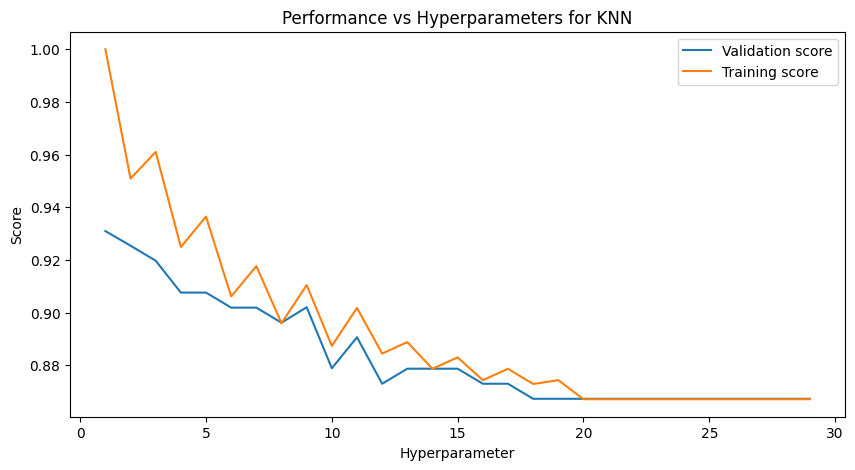

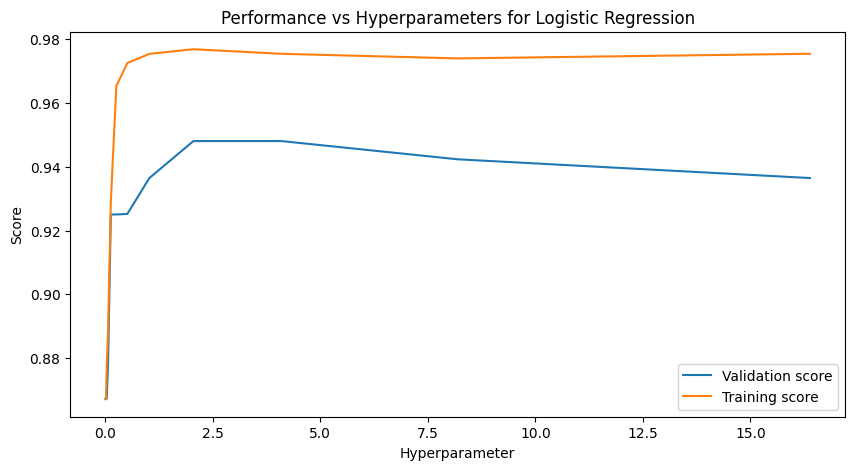

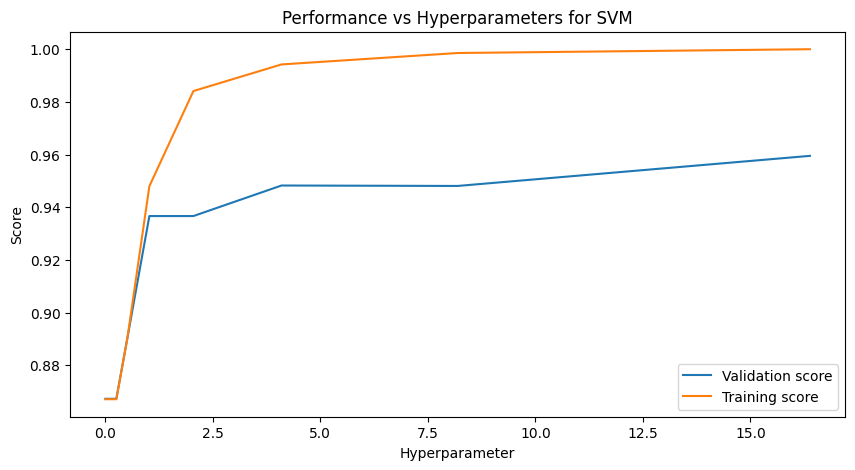

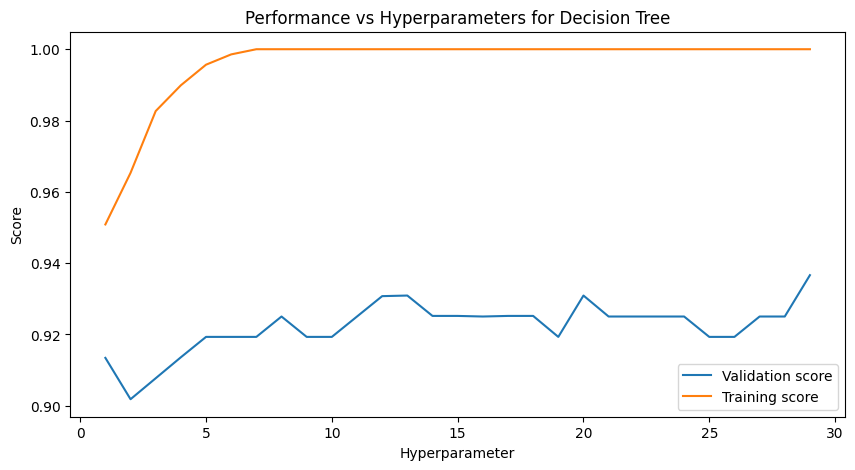

In [6]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
for name, clf in classifiers.items():
    grid = GridSearchCV(clf, hyperparameters[name], cv=5, return_train_score=True)
    grid.fit(X_val, Y_val)
    classifiers[name] = grid.best_estimator_

    # Plot the performance against the values of hyperparameters
    if hyperparameters[name]:  # if the classifier has hyperparameters to tune
        plt.figure(figsize=(10, 5))
        plt.plot(hyperparameters[name][list(hyperparameters[name].keys())[0]], grid.cv_results_['mean_test_score'], label='Validation score')
        plt.plot(hyperparameters[name][list(hyperparameters[name].keys())[0]], grid.cv_results_['mean_train_score'], label='Training score')
        plt.legend()
        plt.xlabel('Hyperparameter')
        plt.ylabel('Score')
        plt.title(f'Performance vs Hyperparameters for {name}')
        plt.show()

### we can also plot the decision tree:

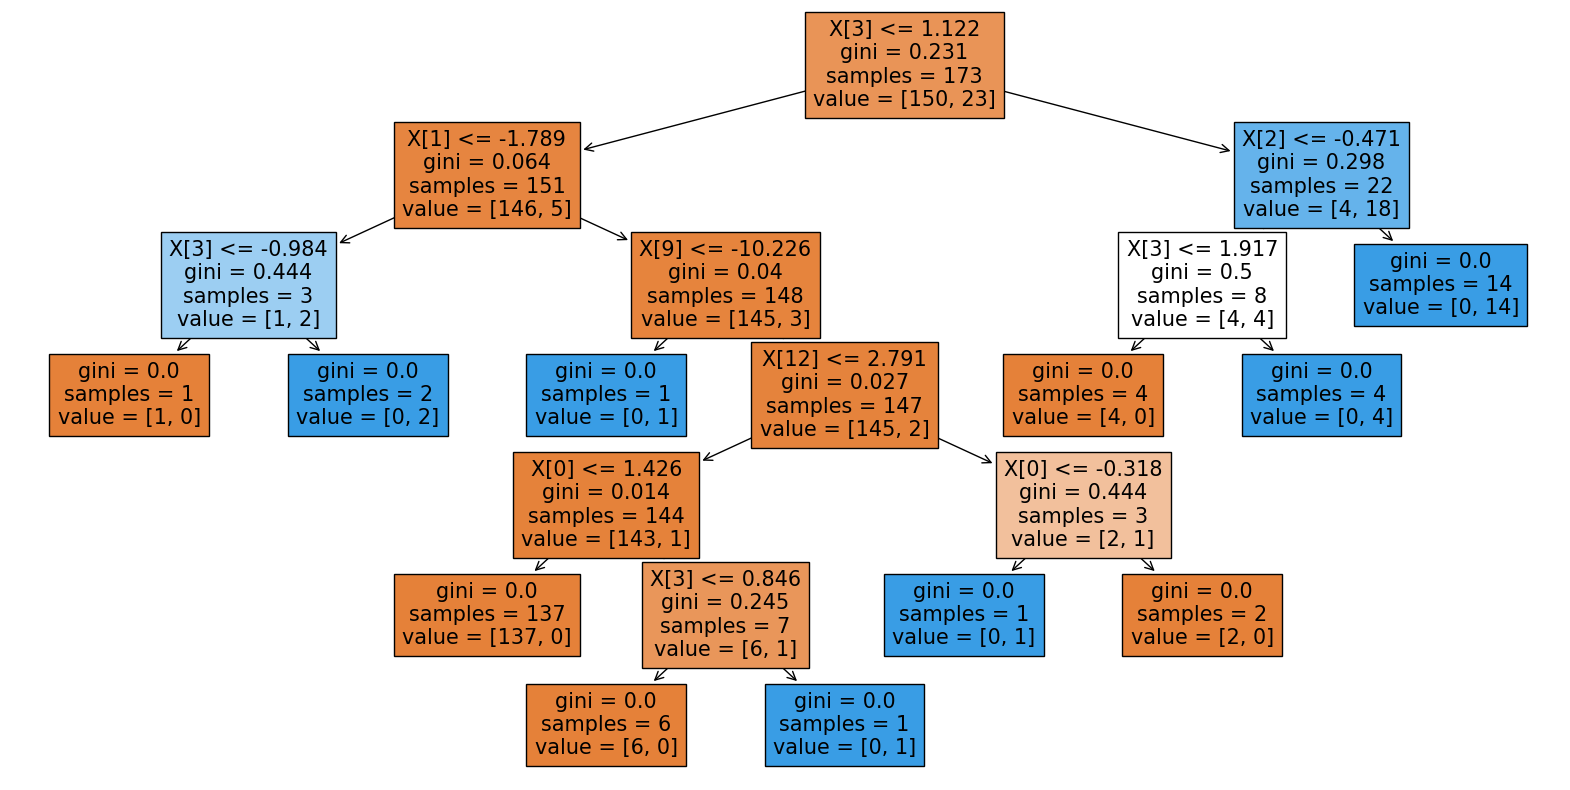

In [7]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifiers['Decision Tree'], filled=True)
plt.show()

## Step 7
Evaluating the models using different evaluation methods.

KNN : 
Precision 0.72
Recall    0.72
F1-score  0.72
ROC/AUC   0.8363513513513514
TPR       0.72
FPR       0.0472972972972973
FNR       0.28
TNR       0.9527027027027027


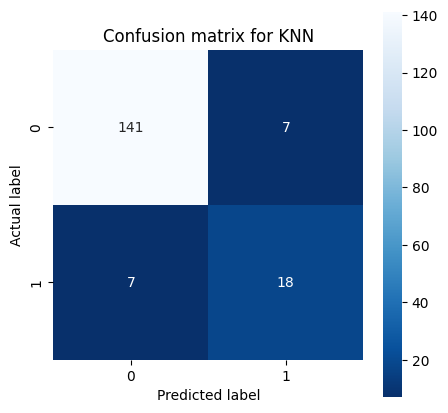

Logistic Regression : 
Precision 0.85
Recall    0.68
F1-score  0.7555555555555556
ROC/AUC   0.8298648648648649
TPR       0.68
FPR       0.02027027027027027
FNR       0.32
TNR       0.9797297297297297


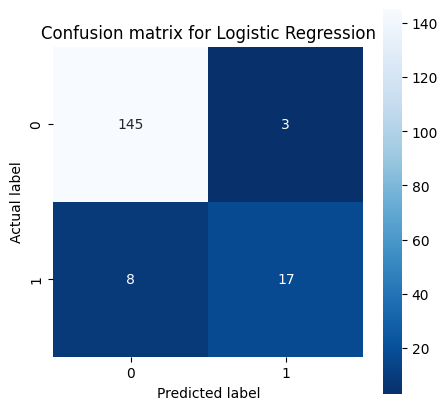

Naive Bayes : 
Precision 0.18699186991869918
Recall    0.92
F1-score  0.3108108108108108
ROC/AUC   0.6221621621621621
TPR       0.92
FPR       0.6756756756756757
FNR       0.08
TNR       0.32432432432432434


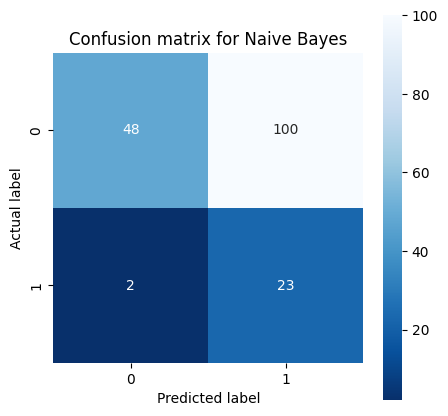

SVM : 
Precision 0.782608695652174
Recall    0.72
F1-score  0.7499999999999999
ROC/AUC   0.8431081081081081
TPR       0.72
FPR       0.033783783783783786
FNR       0.28
TNR       0.9662162162162162


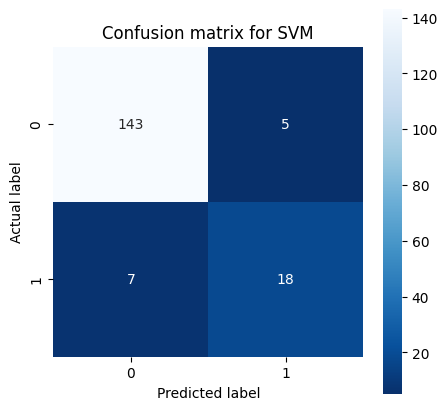

Decision Tree : 
Precision 0.7727272727272727
Recall    0.68
F1-score  0.7234042553191491
ROC/AUC   0.8231081081081082
TPR       0.68
FPR       0.033783783783783786
FNR       0.32
TNR       0.9662162162162162


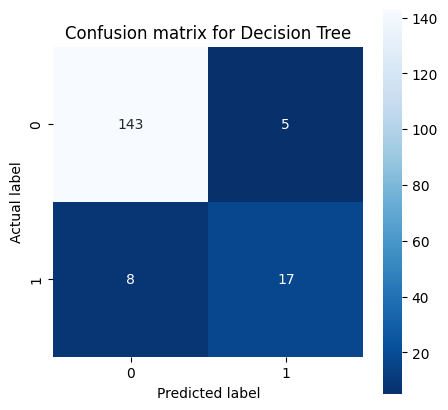

In [8]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
metrics_dict = {name: {} for name in classifiers.keys()}
for name, clf in classifiers.items():
    Y_pred = clf.predict(X_test)
    
    # Calculate TPR, FPR, FNR, TNR
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    
    # Store the metrics in the dictionary
    metrics_dict[name] = {'Precision': precision_score(Y_test, Y_pred),
                          'Recall': recall_score(Y_test, Y_pred),
                          'F1-score': f1_score(Y_test, Y_pred),
                          'ROC/AUC': roc_auc_score(Y_test, Y_pred),
                          'TPR': tpr,
                          'FPR': fpr,
                          'FNR': fnr,
                          'TNR': tnr}

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt=".0f", square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion matrix for {name}')
    print(name,': ')
    for key, value in metrics_dict[name].items():
        print(f'{key: <10}{value}')
    plt.show()


## step 8:
plot histogram to compare between the methods.

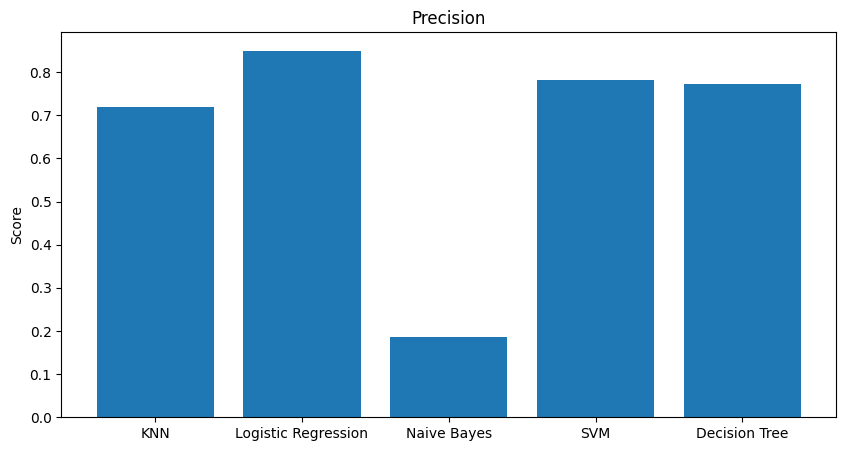

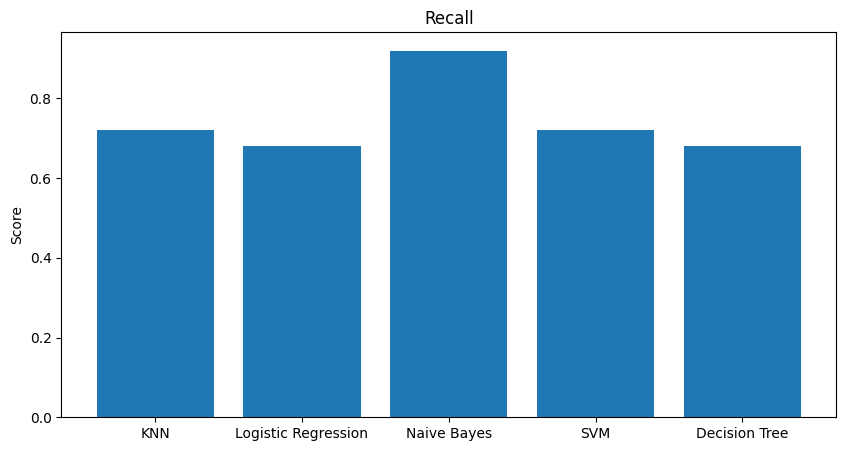

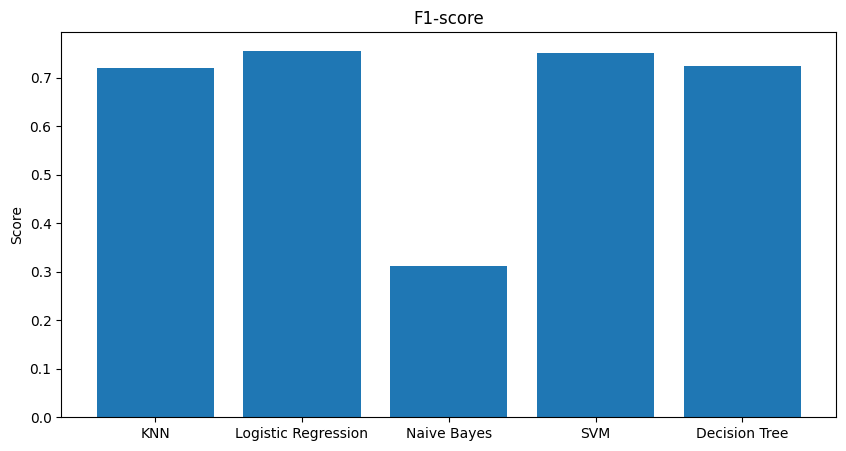

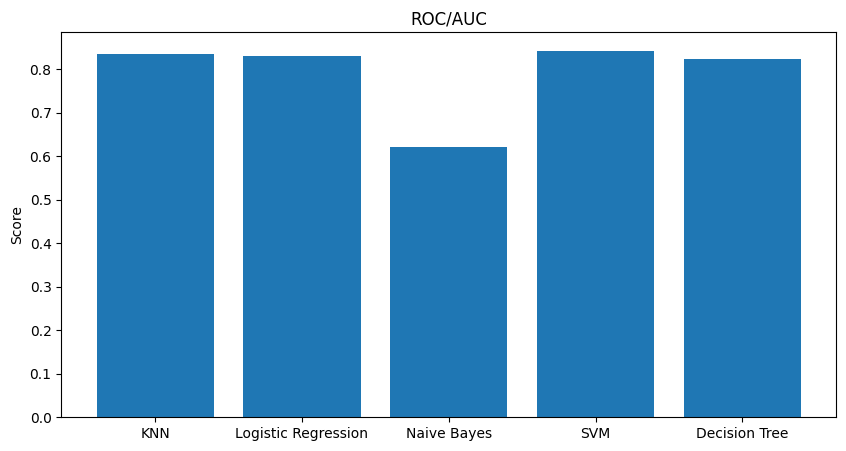

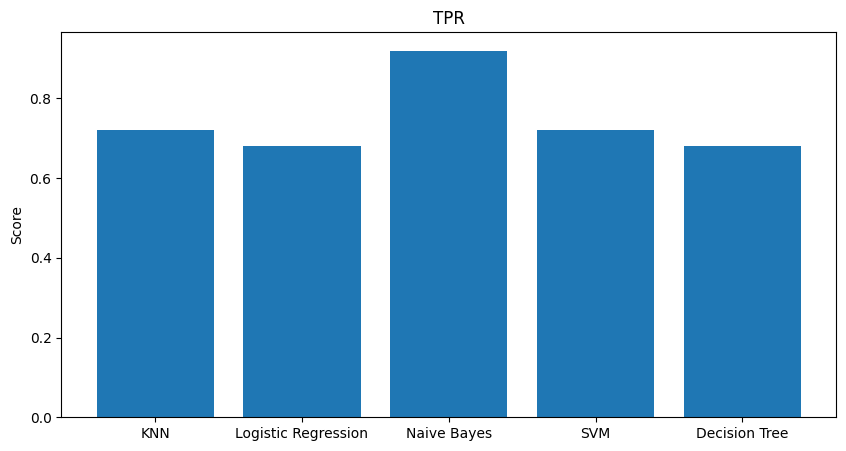

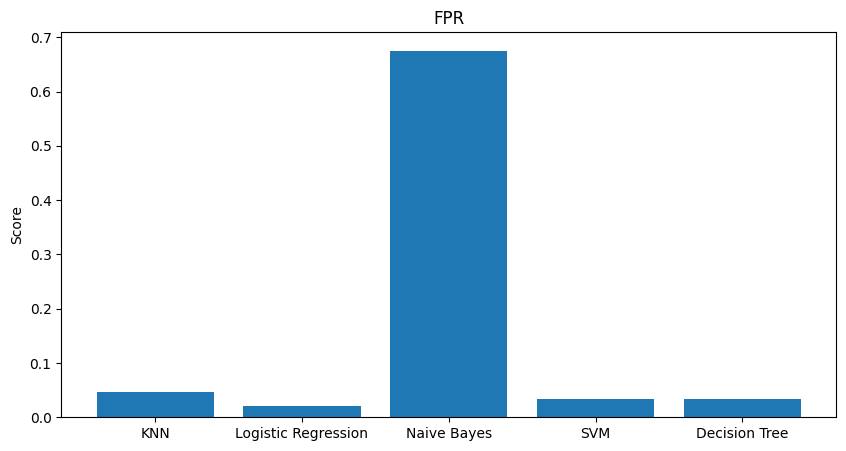

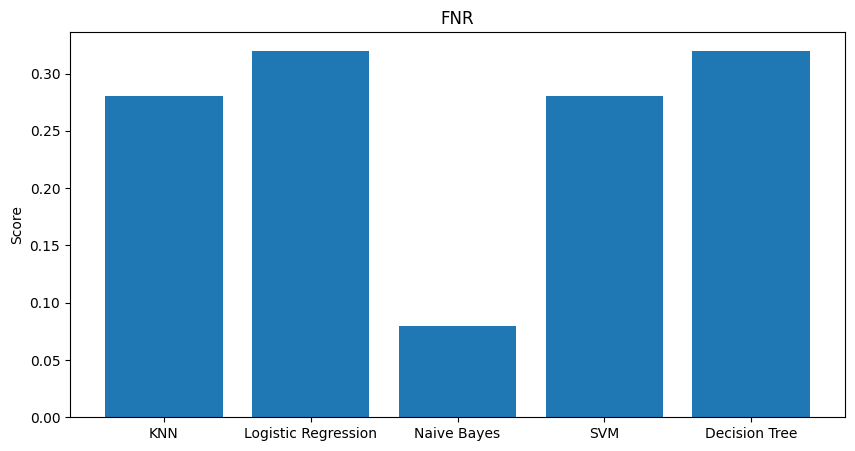

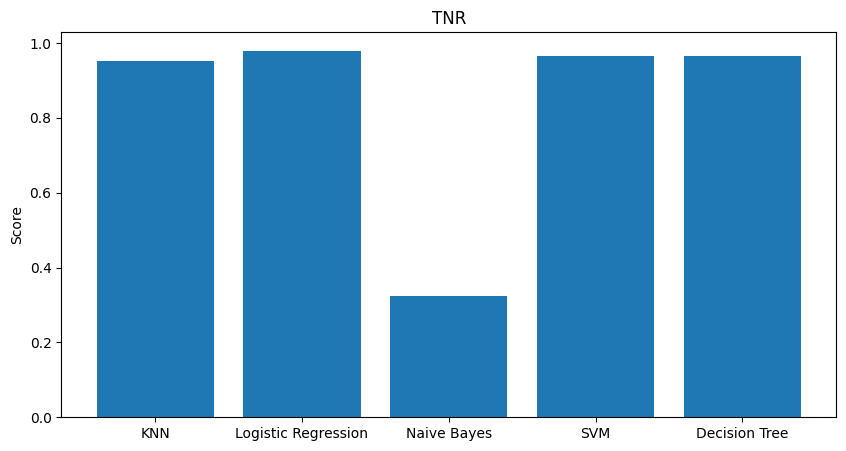

In [9]:
# Plot the histograms
for metric in ['Precision', 'Recall', 'F1-score', 'ROC/AUC', 'TPR', 'FPR', 'FNR', 'TNR']:
    plt.figure(figsize=(10, 5))
    plt.bar(metrics_dict.keys(), [metrics_dict[name][metric] for name in metrics_dict.keys()])
    plt.title(metric)
    plt.ylabel('Score')
    plt.show()

## Step 9
plot the ROC curve of different methods to visualy compare between them.

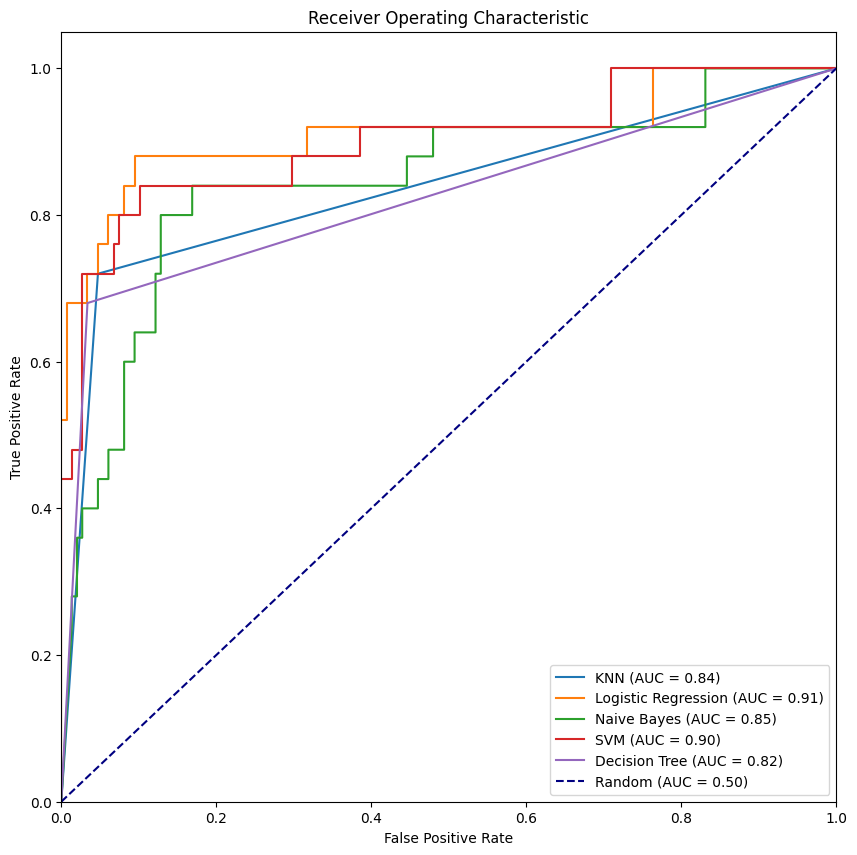

In [10]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:  
        y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion
- Both Logistic regression and Support Vector Machines are very accurate and have alomost the same statistics. but since the LR has slightly lower FPR it would be more suitable for this application (not to tell someone is going to die unless it is sure).
- KNN and decision trees also have a very low FPR but they are less accurate than LR & SVM considering AUC and other statistics.
- the Naive bayes is the worst choise in this context not only it has lower accuracy than LR and SVM but also have a very high FPR which makes it not suitable at all.